# Titanic Data Science Solutions

이 노트북 파일은 <a href='https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312' target='blank'>Data Science Solutions</a>을 참고했다.

본 내용은 Kaggle의 Data science competitions에서 문제를 해결하는 일반적인 작업 흐름도를 제공한다.

Data science competitions의 출품작에는 공부하기 좋은 몇 가지 훌륭한 노트북 파일이 있다. 하지만, 대부분이 왜 이런 방법을 고안했는지에 대한 설명을 생략한 채 작성되었다. 이러한 노트북 파일은 전문가를 위해 전문가가 작성하였다. 이 노트북 파일의 목적은 단계별 작업 흐름도를 따른다. 즉, 해결 방안을 제시하는 각 단계에서 선택한 결정에 대한 합당한 이유를 다룰 것이다.

## Workflow stages

책 Data Science Solutions에서는 competitions 해결을 위해 7단계의 작업 흐름도를 설명한다.
<ol>
    <li>문제 정의하기</li>
    <li>학습 데이터와 테스트 데이터 구하기</li>
    <li>데이터 전처리</li>
    <li>데이터 분석, 패턴 확인, 탐색</li>
    <li>모델링, 예측과 문제 해결</li>
    <li>시각화, 문서화 그리고 문제 해결 단계와 최종 방안 정리</li>
    <li>결과 제출</li>
</ol>
작업 흐름도는 각 단계가 어떻게 다른 단계를 따르는지에 대한 일반적인 순서를 나타낸다. 그러나 예외가 있는 사례도 있다.
<ul>
    <li>여러 개의 작업 흐름도 단계를 결합할 수 있고, 데이터를 시각화하여 분석할 수도 있다.</li>
    <li>앞서 정의한 단계보다 일찍 다른 작업을 진행할 수 있다. 예를 들어 전처리를 하기 전에 데이터 분석을 우선으로 할 수 있다.</li>
    <li>작업 흐름도가 여러 번 반복될 수도 있다. 예를 들어 시각화 단계는 여러번 진행될 수 있다.</li>
    <li>특정 한 단계를 생략할 수 있다. 이는 경쟁을 위해 데이터 세트를 생산하거나 서비스하기 위해 공급 단계가 필요하지 않을 수도 있다는 걸 의미한다.</li>
    </ul>

## 문제 정의하기

Kaggle과 같은 경쟁 사이트는 모델을 학습시키고 테스트하기 위한 데이터를 제공하면서 해결하길 원하는 문제를 정의한다. 타이타닉 생존 경쟁에 대한 자세한 내용은 <a href='https://www.kaggle.com/c/titanic' target='blank'>다음 페이지</a>를 참고하자.

    타이타닉 참사에서 살아남았거나, 살아남지 못한 승객에 대한 훈련 데이터를 통해 모델을 학습한다. 그리고 이 모델을 기반으로, 생존 여부를 포함하지 않은 테스트 데이터가 주어졌을 때 해당 승객이 생존했는지, 그렇지 않은지 예측할 수 있다.

또한, 해당 문제의 배경에 대해 알고 싶을 수 있다. 이에 대한 내용은 <a href='https://www.kaggle.com/c/titanic' taget='blank'>Kaggle competition description page</a>에 자세히 나와있다. 다음은 해당 페이지에서의 주요 내용이다.
<ul>
    <li>1912년 4월 15일, 항해 중인 타이타닉호가 빙산과 충돌 후 침몰하여, 승객과 승무원 총 2,224명 중 1,502명이 사망하였다. 즉, 32%만이 생존하였다.</li>
    <li>난파선이 이 정도의 인명 피해를 입게 된 이유 중하나는 승객과 승무원을 위한 구명보트가 충분하지 않았기 때문이다.</li>
    <li>비록 침몰에서 살아남는 데 운이 좋았던 이유도 있겠지만, 여성, 어린이 그리고 상류층과 같은 특정 그룹의 사람이 다른 사람보다 생존할 가능성이 더 높았다.</li>
    </ul>

### 작업 흐름도의 목표

본 데이터 사이언스 작업 흐름도는 7개의 목표를 다룬다.<br><br>
<b>Classifying.</b>샘플을 분류 또는 그룹화하여 그들간의 상관관계나 영향력을 이해한다.<br><br>
<b>Correlating.</b>학습 데이터셋에서 사용할 수 있는 특성을 기반으로 문제에 접근할 수 있다. 데이터셋에서 어떤 특성이 생존 여부에 가장 크게 영향을 미치는가? 특성과 최종 값 사이에 통계적으로 <a href='https://en.wikiversity.org/wiki/Correlation' target='blank'>상관성</a>이 있는가? 특성 값이 바뀌면 생존 여부도 바뀌는가? 그 반대는 어떠한가? 이는 주어진 데이터셋의 수치 및 범주형 특성 모두에 대해 테스트할 수 있다. 또한, 후속 연구 및 작업 흐름도 단계를 위해 특성 간의 상관관계를 결정할 수 있다. 특정 특성을 조합하면 creating, completing 또는 correcting하는 데 도움이 될 수 있다.<br><br>
<b>Converting.</b>모델링 단계를 위해, 데이터를 전처리할 필요가 있다. 어떤 모델 알고리즘을 선택할 지에 따라 모든 특성을 수치형 값으로 변환해야 할 수도 있다. 예를 들어, 텍스트 범주형 데이터를 수치형 값으로 변환한다.<br><br>
<b>Completing.</b> 데이터 전처리는 특성에서 결측치를 채워야할 수 있다. 모델 알고리즘은 결측치가 없을 때 최고의 성능을 내기 때문이다.<br><br>
<b>Correcting.</b>주어진 훈련 데이터셋을 분석하여 이상치 또는 특이치를 찾아 수정하거나 제외할 수 있다. 이러한 값들은 분석에 도움을 주지 않거나 결과를 크게 왜곡할 수 있으므로 완전히 삭제할 수도 있다.<br><br>
<b>Creating.</b>새로운 특성이 상관 관계, 변환, 완전성의 목표를 따르도록 기존의 특성을 기반으로 새로운 특성을 만든다.<br><br>
<b>Charting.</b>데이터셋과 생존 여부의 관계성을 자연스럽게 나타낼 수 있는 시각화를 선택한다.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## 학습 데이터와 테스트 데이터 구하기

파이썬의 판다스 패키지는 데이터셋을 편리하게 다룰 수 있게 해준다. 우선 학습 데이터와 테스트 데이터셋을 구해 판다스의 데이터프레임으로 만든다. 또한, 이들을 병합해 두 데이터셋 전부에 특정한 처리를 할 수 있도록 한다.

In [2]:
train_df = pd.read_csv('./datasets/titanic/train.csv')
test_df = pd.read_csv('./datasets/titanic/test.csv')
combine = [train_df, test_df]

### 데이터를 탐색하며 분석하기

판다스는 프로젝트 초기에 다음 질문에 대답하는데 도움이 된다.

<b>데이터셋에서 사용할 수 있는 특성은 무엇인가?</b>

직접 조작하거나 분석하기 위해 특성 이름을 알아두는게 좋다. 이 특성들에 대한 자세한 설명은 <a href='https://www.kaggle.com/c/titanic/data' target='blank'>Kaggle data page</a>를 참고하도록 한다.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<b>범주형 특성은 무엇인가?</b>

범주형 특성은 고유한 값이나 범주 수가 제한된 변수이다. 범주형 변수는 <b>명목</b><sup>Categorical</sup>이거나 <b>순서</b><sup>Ordinal</sup>로 구분된다.
<ul>
    <li>Categorical: Survived, Sex, and Embarked</li>
<li>Ordinal: Pclass</li>
    </ul>

<b>수치형 특성은 무엇인가?</b>

수치형 특성은 관측된 값이 수치로 측정되는 변수이다. 수치형 변수는 <b>연속</b><sup>Continuous</sup>이거나 <b>이산</b><sup>Discrete</sup>으로 구분된다.
<ul>
    <li>Continous: Age, Fare</li>
    <li>Discrete: SibSp, Parch</li>
    </ul>

In [5]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>데이터 타입이 혼합된 특성은 무엇인가?</b>
 - Ticket 특성과 Cabin 특성이 수치와 알파벳이 혼합되어 있다.

<b>어떤 특성이 오류 또는 오타를 포함하는가?</b>

대규모 데이터셋에서 이것을 검토하는 것은 어려울 일이지만, 작은 데이터셋을 추출한 후 몇몇 샘플을 검토하다 보면 수정이 필요한 특성이 무엇인지 알 수 있다.
- 가명이나 짧은 이름에 사용되는 괄호, 따옴포 등 Name 특성에는 이러한 오류나 오타가 포함될 수 있다.

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<b>결측치를 포함하는 특성은 무엇인가?</b>
이에 해당하는 특성들은 수정이 필요하다.
<ul>
    <li>학습 데이터셋에서는 Cabin > Age > Embarked 순으로 결측치를 많이 포함하고 있다.</li>
    <li>테스트 데이터셋에서는 Cabin > Age 순으로 결측치를 많이 포함하고 있다.</li>
    </ul>

<b>데이터 타입에는 어떤 형식의 특성이 존재하는가?</b>
<ul>
    <li>학습 데이터셋에서는 7개의 특성이 정수형 또는 실수형이며, 테스트 데이터셋에서는 이와 같은 특성이 6개 존재한다(Survived 특성 제외).</li>
    <li>strings(object) 특성은 5개가 존재한다.</li>
    </ul>

In [7]:
train_df.info()
print('_' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

<b>샘플 전체에서 수치형 특성 값의 분포는 어떤가?</b>

수치형 데이터의 분포를 아는 것은 인사이트 도출에 도움이 될 수 있고, 주어진 훈련 데이터셋의 대표성을 알 수 있다.
<ul>
    <li>전체 샘플은 Titanic 호에 탑승한 실제 승객 수(2,224명)의 40%인 891명이다.</li>
    <li>생존 여부(Survived)는 범주형 특성으로 0과 1로 나타냈다.</li>
    <li>약 38%의 샘플이 실제 생존율 32%를 나타낸다.</li>
    <li>대부분의 승객(75% 이상)이 부모 또는 자녀를 동반하지 않았다.</li>
    <li>대략 30%의 승객이 형제나 배우자와 함께 탑승했다.</li>
    <li>요금은 512달러까지 지불하는 소수의 승객(1% 미만)으로 인해 상당히 다양하게 분포한다.</li>
    <li>65-80세 미만의 고령 승객은 거의 없다(1% 미만).</li>
    </ul>

In [8]:
train_df.describe()
# Survived - percentiles=[.61, .62]
# Parch - percentiles=[.75, .8]
# SibSp - percentiles[.68, .69]
# Age, Fare - percentiles[.1, .2, ..., .9, .99]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>샘플 전체에서 범주형 특성 값의 분포는 어떤가?</b>

<ul>
    <li>모든 샘플의 이름이 고유하다(count=unique=891).</li>
    <li>성별은 2가지로, 65%가 여성이다(top=male, freq=577/count=891).</li>
    <li>객실에는 표본에 몇몇 중복이 있거나 여러 명의 승객이 객실을 공유했다</li>
    <li>승선은 3가지의 값이 있다. S 포트가 가장 많은 승객을 태웠다(top=S).</li>
    <li>티켓 특성은 중복 값(unique=681)의 비율이 높다(22%).</li>
    </ul>

In [17]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석을 기반으로 가정하기

지금까지 수행한 데이터 분석을 기반으로 다음과 같은 가정을 세울 수 있다. 또한, 적절한 조치를 취하기 전에 세운 가정을 추가로 검증할 수 있다.

<b>Correlating.</b><br><br>
각 특성을 생존 여부와 어떻게 하면 효과적으로 연관시킬 수 있을지 알고 싶다. 따라서 프로젝트 초기에 상관관계를 빠르게 나타내고, 후반부에 모델링 결과로 얻은 상관 관계와 일치시키길 기대할 수 있다.


<b>Completing.</b><br>
<ol>
    <li>생존 여부와 확실히 연관있을 것으로 추측되는 나이 특성을 완성할 수 있다.</li>
    <li>승선 특성 또한 생존 여부 또는 다른 중요한 특성과 관련 있을 수 있으므로 완성할 수 있다.</li>
    </ol>

<b>Correcting.</b><br>
<ol>
    <li>티겟 특성은 중복 값의 비율이 높고(22%) 티켓과 생존 여부는 유의미한 관계가 없기에 우리의 분석에서 제외될 수 있다.</li>
    <li>객실 특성은 훈련 데이터셋과 테스트 데이터셋 모두 결측치가 너무 많으므로 제외될 수 있다.</li>
    <li>승객ID는 생존 여부에 기여할 수 없기에 제외될 수 있다</li>
    <li>이름 특성은 비교적 표준적이지 않으며, 생존 여부에 집접적으로 기여할 수 없으므로, 제외될 수 있다.</li>
    </ul>

<b>Creating.</b><br>
<ol>
    <li>Parch와 SibSp 특성을 합하여 승선한 가족 구성원의 수를 나타내는 Family 특성을 새로 생성할 수 있다.</li>
    <li>이름 특성을 전처리하여 성을 추출하여 새 특성으로 생성할 수 있다.</li>
    <li>연속적인 수치형 특성인 나이를 대신해 순서가 있는 범주형 특성인 연령대를 새로 생성할 수 있다.</li>
    <li>또한, 나이와 비슷하게 요금을ㄹ 순서가 있는 범주형 특성으로 만들어 우리의 분석에 도움이 될 수 있다.</li>
    </ol>

<b>Classifying.</b><br><br>
앞서 언급했던 문제 설명을 기반으로 가정을 추가할 수도 있다.
<ol>
    <li>여성(Sex=female)의 생존율이 더 높다.</li>
    <li>아이(Age＜?)의 생존율이 더 높다.</li>
    <li>상위 클래스의 승객(Pclass=1)의 생존율이 더 높다.</li>
</ol>

### 특성을 피벗하면서 분석

일부 관측치 및 가정을 확인하기 위해 특성을 서로 피벗하여 상관 관계를 빠르게 분석할 수 있다. 이 과정은 결측치가 없는 특성에 대해서만 적용할 수 있다. 또한, 범주형(Sex), 순서형(Pclass) 또는 이산형(SibSp, Parch)에 대해서만 적용하는 것이 합당하다.
<ul>
    <li><b>Pclass</b><br> Pclass=1과 Survived에서 상당한 상관 관계(>0.5)를 관측할 수 있다(classifying #3). 이에 모델링에 Pclass 특성을 포함하기로 한다.</li>
    <li><b>Sex</b><br> 문제 정의에서 언급했듯이, 여성(Sex=female)의 생존율이 74%로 높은 편이다(classifying #1).</li>
    <li><b>SibSp and Parch</b><br>특정 값에서 상관 관계가 0인 경우가 있다. 이러한 특성들의 조합으로 새로운 특성을 추출하는 것이 가장 좋을 수 있다(creating #1).</li>
    </ul>

In [21]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean() \
                                .sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean() \
                             .sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean() \
                               .sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean() \
                               .sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 데이터를 시각화하여 분석하기

이제 시각화를 통해 데이터를 분석하고 앞서 세운 가정들을 확인할 것이다.

#### Correlating numerical features

수치형 특성들과 생존 여부 간의 상관 관계를 이해하는 것으로 시작해보자.

히스토그램 차트는 나이 같은 연속적인 수치형 변수를 분석하는 데 유용하며 그 안에서 패턴을 식별하는데 도움이 된다. 히스토그램은 자동으로 빈도 또는 범위의 구간을 설정하여 샘플 분포를 나타낼 수 있다. 이는 특정 구간에 관련된 질문에 답하는데 도움이 된다(유아의 생존율이 더 높은가?).

히스토그램의 x축은 샘플 또는 승객의 수를 나타낸다.

<b>Observations.</b>
<ul>
    <li>유아(Age ≤ 4)의 생존율이 더 높다.</li>
    <li>최고령 승객(Age = 80)이 생존했다.</li>
    <li>15-25세의 많은 승객이 사망했다.</li>
    <li>승객 대부분은 15-35세이다.</li>
    </ul>

<b>Decisions.</b>
앞서 세운 가정을 후속 작업 흐름도 단계에서 결정을 내릴 때 참고한다.
<ul>
    <li>우리는 모델을 학습시킬 때 나이를 고려해야 한다(가정 classifying #2).</li>
    <li>Age 특성의 결측치를 채운다(completing #1).</li>
    <li>나이대 나타내는 특성을 생성한다(creating #3).</li>
    </ul>

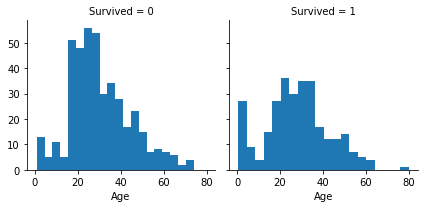

In [30]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

#### Correlating numerical and ordinal features

단일 그래프를 사용하여 상관 관계를 확인하기 위해 여러 특성을 결합할 수 있다. 이는 수치형 특성과 숫자 값을 갖는 범주형 특성을 대상으로 진행할 수 있다. 

<b>Observations.</b>
<ul>
    <li>승객의 대부분이 Pclass=3이지만, 사망했다. 가정 classifying #2를 확인한다.</li>
    <li>Pclass=2 와 Pclass=3의 유아 승객은 대부분 생존했다. 가정 classifying #2를 추가 검증한다.</li>
    <li>Pclass=1인 대부분의 승객은 생존했다. 가정 classifying #3를 확인한다.</li>
    <li>각 Pclass의 승객 연령 분포는 다르다.</li>
    </ul>

<b>Decisions.</b>

- 모델 학습에 Pclass를 고려한다.

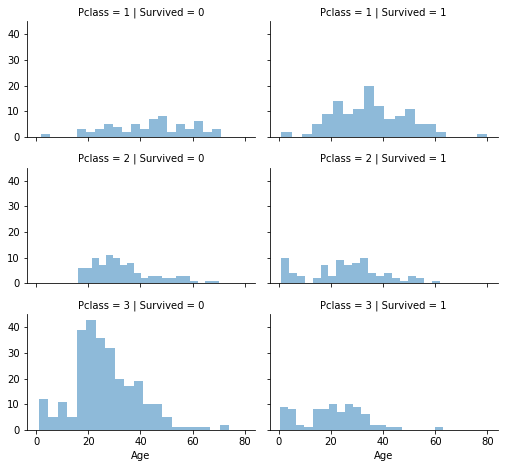

In [33]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Correlating categorical features

생존 여부와 범주형 특성을 연관시켜본다.

<b>Observations.</b>
<ul>
    <li>여성 승객이 남성 보다 더 많이 생존했다. classifying #1을 확인한다.</li>
    <li>Embarked=C에서 남성이 더 높은 생존율을 보이는 예외가 있다. 이는 Pclass와 Embarked, Pclass와 Survived 사이의 상관관계일 수 있으며 Embarked와 Survived 사이의 직접적인 상관관계일 필요는 없다.</li>
    <li>Embarked=Q일 때, Pclass=2보다 Pclass=3의 남성 생존율이 더 높다. completing #2를 확인한다.</li>
    <li>Pclass=3의 남성 생존율이 Embarked마다 다양하다. Correlating #1을 확인한다.</li>
    </ul>

<b>Decisions.</b>
<ul>
    <li>모델 학습에 Sex 특성을 추가한다.</li>
    <li>Embarked 특성을 완성하여 모델 학습에 추가한다.</li>
    </ul>

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


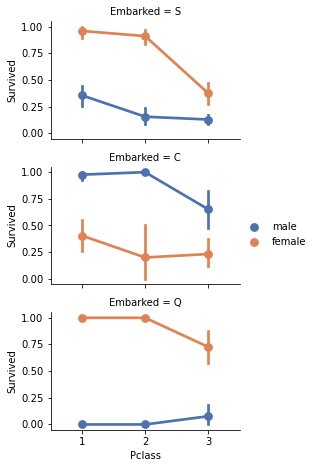

In [38]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

#### Correlating categorical and numerical features